# Exercícios

### Gerando algumas visualizações descritivas com matplotlib

Vamos utilizar um dataset [dos preços dos combustíveis no Brasil](https://www.kaggle.com/datasets/matheusfreitag/gas-prices-in-brazil).

Reproduza as visualizações abaixo. Para cada uma, pense em pontos que você poderia modificar na visualização, pensando em aprimorá-la.

#### Preços médios do etanol e da gasolina, por região do Brasil

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('2004-2021.tsv', sep='\t', header=0)
df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


In [17]:
df['PRODUTO'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10', 'OLEO DIESEL', 'OLEO DIESEL S10',
       'GASOLINA ADITIVADA'], dtype=object)

In [19]:
df_etanol_media = df.loc[df['PRODUTO']=='ETANOL HIDRATADO',['DATA INICIAL','REGIÃO','PREÇO MÉDIO REVENDA']]
df_gasolina_media = df.loc[df['PRODUTO']=='GASOLINA COMUM',['DATA INICIAL','REGIÃO','PREÇO MÉDIO REVENDA']]
df_etanol_media.head()

,DATA INICIAL,REGIÃO,PREÇO MÉDIO REVENDA
0,2004-05-09,CENTRO OESTE,1.288
1,2004-05-09,CENTRO OESTE,1.162
2,2004-05-09,CENTRO OESTE,1.389
3,2004-05-09,CENTRO OESTE,1.262
4,2004-05-09,NORDESTE,1.181


In [33]:
x = df_etanol_media['DATA INICIAL'].unique().tolist()
y = df_etanol_media.loc[df_etanol_media['REGIÃO']=='CENTRO OESTE',['DATA INICIAL','PREÇO MÉDIO REVENDA']].groupby('DATA INICIAL')['PREÇO MÉDIO REVENDA'].mean().tolist()

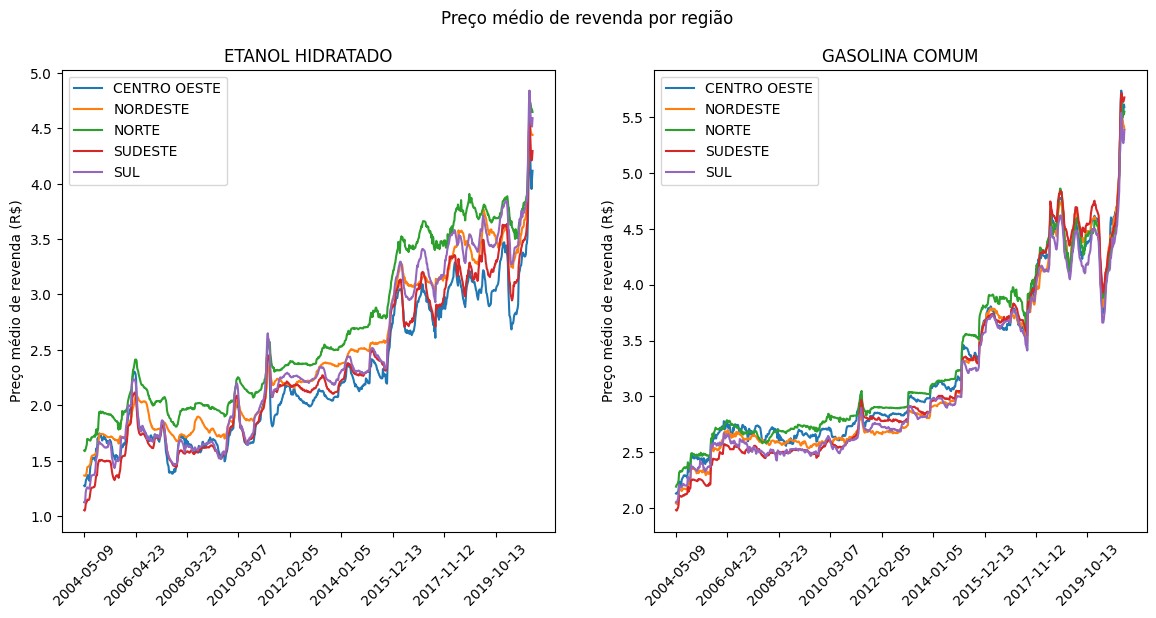

In [62]:
regioes = df_etanol_media['REGIÃO'].unique().tolist() # cria lista com todas regiões
x = df_etanol_media['DATA INICIAL'].unique().tolist()

fig = plt.figure(figsize=(14,6)) # declara uma figura

# criando o primeiro gráfico
plt.subplot(1,2,1) 

for regiao in regioes: 
    y = df_etanol_media.loc[df_etanol_media['REGIÃO']==regiao,['DATA INICIAL','PREÇO MÉDIO REVENDA']].groupby('DATA INICIAL')['PREÇO MÉDIO REVENDA'].mean().tolist()
    plt.plot(x, y, label = regiao)  #plota o gráfico de cada região

plt.xticks(x[::100],rotation=45) # pega de 100 em 100 datas
plt.ylabel('Preço médio de revenda (R$)')
plt.title('ETANOL HIDRATADO')
plt.legend()

# criando o segundo gráfico
plt.subplot(1,2,2) 

for regiao in regioes: 
    y = df_gasolina_media.loc[df_gasolina_media['REGIÃO']==regiao,['DATA INICIAL','PREÇO MÉDIO REVENDA']].groupby('DATA INICIAL')['PREÇO MÉDIO REVENDA'].mean().tolist()
    plt.plot(x, y, label = regiao)  #plota o gráfico de cada região

plt.xticks(x[::100],rotation=45) 
plt.ylabel('Preço médio de revenda (R$)')
plt.title('GASOLINA COMUM')
plt.legend()

plt.suptitle('Preço médio de revenda por região')
plt.show()

#### Preço médio em 2020 dos preços do Etanol e da Gasolina por região

#### Total consolidado de postos para cada estado

#### Relação entre preço da gasolina e do etanol (nível Brasil)